In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,id,name,popularity,duration_ms,artists,id_artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,release_month,release_day
0,269,blun7 a swishland,63,167760.0,['tha Supreme'],['19i93sA0D7yS9dYoVNBqAA'],0.692,0.792,7,-5.984,0.2450,0.1300,0.000000,0.2550,0.566,129.883,2019,11.0,15.0
1,27504,Que Me Perdone Tu Señora,42,150640.0,['Manoella Torres'],['4JRKcLbpjobmoOVoOXPd6y'],0.608,0.447,6,-12.151,0.0663,0.3350,0.000035,0.1690,0.673,90.777,2007,3.0,21.0
2,16082,愛唄~since 2007~,42,242373.0,['whiteeeen'],['6v3VFX2qIWthj4Lr5QIxts'],0.572,0.782,8,-5.275,0.0361,0.3060,0.000000,0.3740,0.450,170.050,2016,3.0,9.0
3,14585,Let me be your uncle tonight,12,202989.0,['Tvíhöfði'],['6rmrk3Jk0Ecf8fjioCCZmV'],0.855,0.470,7,-9.252,0.1620,0.0111,0.000002,0.2640,0.864,102.008,2001,1.0,1.0
4,14740,Never Going Back Again - 2004 Remaster,40,134400.0,['Fleetwood Mac'],['08GQAI4eElDnROBrJRGE0X'],0.654,0.336,6,-12.825,0.0379,0.8580,0.385000,0.0786,0.947,176.083,1977,2.0,4.0


In [3]:
artists = pd.read_csv("data/artists.csv")
artists.rename(columns={
    "popularity": "artist_popularity", "name": "artist_name", "id": "artist_id"
}, inplace=True)
artists.head()

,artist_id,followers,genres,artist_name,artist_popularity
0,55CXG5KDJpRYwBopfYAJHa,21756,"['country blues', 'country rock', 'piedmont bl...",Jorma Kaukonen,40
1,08mjMUUjyTchMHCW7evc3R,640993,['turkish pop'],Hande Yener,62
2,3Ebn7mKYzD0L3DaUB1gNJZ,161509,"['celtic', 'irish folk']",Christy Moore,56
3,7GfaHcpmNcrcHoyGnOBsAz,9578,"['kindermusik', 'kleine hoerspiel']",Die Biene Maja,56
4,1DYXGLnfNDt8mO2aK9k83j,48876,"['opm', 'vispop']",Jay-R Siaboc,39


## Missing values

In [4]:
train[train.isna().any(axis=1)]

,id,name,popularity,duration_ms,artists,id_artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,release_month,release_day
8,29489,From Four Until Late,10,145827.0,['Robert Johnson'],['0f8MDDzIc6M4uH1xH0o0gy'],0.751,0.167,0,-11.949,0.0474,0.961,0.000026,0.1650,0.569,108.514,1936,NaN,NaN
16,29341,Vielä yhdet,6,141067.0,['Irwin Goodman'],['2tHIsowfInSrlyGfsOKwvE'],0.497,0.638,5,-12.451,0.0383,0.218,0.000001,0.5240,0.926,86.828,1972,NaN,NaN
17,2476,語りつぐ愛に,30,251227.0,['Hiroko Yakushimaru'],['1QXFMGfCga8qSyUtVmjXrE'],0.715,0.563,1,-11.740,0.0276,0.602,0.000023,0.3300,0.617,120.886,1989,NaN,NaN
22,11363,Petit Madame,6,177440.0,['TIN TAN Y MARCELO'],['329jSyGubpAb5CEw6IE0Ix'],0.390,0.397,11,-8.735,0.0769,0.943,0.000000,0.3550,0.307,48.433,1948,NaN,NaN
27,25541,Moses Supposes,12,172253.0,"['Gene Kelly', 'Donald O´Connor']","['1mhlGWeiNrWnhJJc2EufYk', '1yEfnpGYltiMGUHBFG...",0.416,0.786,0,-4.757,0.2240,0.811,0.000001,0.2830,0.760,95.759,1952,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20979,11110,Lumi teki enkelin eteiseen,44,207600.0,['Hector'],['5UaXeIdkgIbWPwnClfQIU5'],0.482,0.572,0,-7.535,0.0296,0.663,0.000002,0.2180,0.378,85.859,1973,NaN,NaN
20985,9014,Il Colonnello,15,222000.0,['Lucio Dalla'],['25MkkfEousyfp2eyh38FUl'],0.395,0.408,0,-14.234,0.0450,0.776,0.007260,0.2770,0.580,136.513,1970,NaN,NaN
20987,16779,Llora (Cry),13,164667.0,['Lalo Carrion'],['4o9zpJlE7McnO0uN1CQ32x'],0.257,0.384,7,-9.810,0.0349,0.977,0.417000,0.1160,0.261,119.401,1962,NaN,NaN
20988,17039,Cient' anne,38,307893.0,"['Mario Merola', ""Gigi D'Alessio""]","['3oQugwTJgLV6SUEE3iqacm', '4eSMsVzRJHhN1aq0Iv...",0.236,0.463,8,-10.285,0.0316,0.588,0.000000,0.0922,0.236,171.806,2000,NaN,NaN


In [5]:
artists[artists.isna().any(axis=1)]

,artist_id,followers,genres,artist_name,artist_popularity


## EDA

<AxesSubplot:xlabel='popularity', ylabel='Count'>

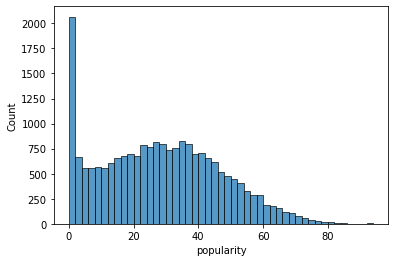

In [6]:
# Look at distribution of target
sns.histplot(train['popularity'])

<AxesSubplot:xlabel='release_year', ylabel='Count'>

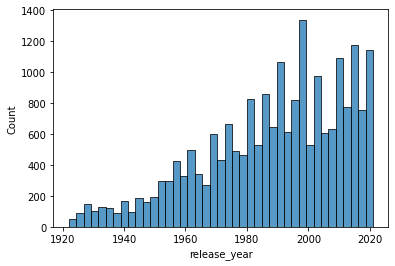

In [7]:
sns.histplot(train['release_year'])

<AxesSubplot:>

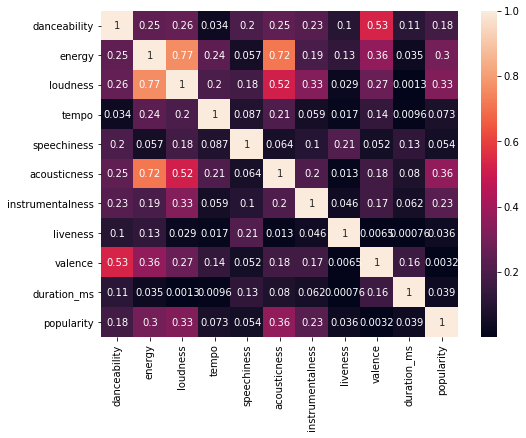

In [8]:
quant_cols = [
        'danceability', 'energy', 'loudness', 'tempo', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms',
        'popularity'
]
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(np.abs(train[quant_cols].corr()), annot=True, ax=ax)

## Modeling

In [9]:
# Average popularity (baseline)
baseline_pred = [train['popularity'].mean()] * len(train)
rmse(train['popularity'], baseline_pred)

18.475554092562714

In [10]:
train.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'artists', 'id_artists',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'release_year', 'release_month', 'release_day'],
      dtype='object')

In [11]:
# Define pipeline function

def get_design_matrix(data):
    
    # Incorporate artist info
    df = data.copy()
    df['main_artist'] = (
        df['artists']
        .str.replace("[\[\]']+", "", regex=True)
        .str.split(",", expand=True)[0]
    )
    df['id_main_artist'] = (
        df['id_artists']
        .str.replace("[\[\]']+", "", regex=True)
        .str.split(",", expand=True)[0]
    )
    df = df.merge(artists, how='left', left_on='id_main_artist', right_on='artist_id')
    df.fillna(0, inplace=True)
    
    # Select features
    continuous_features = [
        'energy', 'loudness', 'acousticness', 'instrumentalness',
        'tempo', 'speechiness', 'liveness', 'valence', 'danceability',
    ]
    discrete_features = ['release_year', 'followers', 'artist_popularity']
    feature_cols = continuous_features + discrete_features
    X = df[feature_cols]
    
#     # Standardize continuous features
    X.loc[:, continuous_features] = (X[continuous_features] - X[continuous_features].mean()) / X[continuous_features].std()
    
    # Nonlinear transformations
#     for feat in continuous_features:
#         X[f'{feat}^2'] = X[f'{feat}']**2
#         X[f'{feat}^3'] = X[f'{feat}']**3
#         X[f'sqrt({feat})'] = np.sqrt(np.abs(X[f'{feat}']))
#         X[f'log({feat})'] = np.log(np.abs(X[f'{feat}']))
    
    return X

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

models = {
    'ols': LinearRegression(),
    'dt': DecisionTreeRegressor(max_depth=8),
    'rf': RandomForestRegressor(n_estimators=50, max_depth=8, random_state=24),
#     'gb': GradientBoostingRegressor(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=24),
}

evaluate_models(models, train, get_design_matrix)

ols CV Train RMSE: 12.616999794596186		ols CV Val RMSE: 12.626669647750052
dt CV Train RMSE: 11.081895147156812		dt CV Val RMSE: 12.104641063250188
rf CV Train RMSE: 10.63292718508881		rf CV Val RMSE: 11.51619332187468
gb CV Train RMSE: 6.100866998301312		gb CV Val RMSE: 11.474543795609268


In [13]:
test = pd.read_csv("data/test.csv")
test.head()

,id,name,duration_ms,artists,id_artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,release_month,release_day
0,21594,Glitter And Gay (from Candide) - Voice,344067.0,['Lehman Engel'],['6uq6cUwOJmgO50qP4hIrTr'],0.390,0.191,8,-15.960,0.0947,0.868,0.087000,0.140,0.251,83.194,1949,NaN,NaN
1,23733,Din Hai Bahar Ke,285153.0,"['Asha Bhosle', 'Mahendra Kapoor']","['5as8A4G47Ohu9NSWs3Je8U', '6MoG33ssSzwwE3YJS4...",0.551,0.548,7,-6.610,0.0558,0.979,0.049100,0.309,0.891,92.828,1965,7.0,28.0
2,17440,Frescura Antigua,192672.0,['Los Jaivas'],['750f5Yoi20mYBe2EoVqWiT'],0.328,0.498,7,-13.351,0.0465,0.656,0.949000,0.223,0.429,92.623,1977,3.0,30.0
3,20756,雨たらたら,288799.0,"['Spinna B-ill,the cavemans']",['5OB0ZQnwOCy4twLRaXeYWF'],0.763,0.598,7,-6.498,0.0430,0.221,0.000000,0.315,0.924,122.077,2002,8.0,7.0
4,29495,惜別的海岸,213720.0,['Jody Chiang'],['3jPL2UtbCi2DuvuK2dolR6'],0.482,0.339,11,-10.198,0.0276,0.537,0.000004,0.162,0.285,88.090,1991,1.0,1.0


In [14]:
X_test = get_design_matrix(test)
preds = models['rf'].predict(X_test)
preds = np.clip(preds, a_min=0, a_max=100)    # 0 <= popularity <= 100
preds = np.rint(preds)    # round to nearest integer

In [15]:
submission_df = pd.DataFrame(data={
    'id': test['id'],
    'popularity': preds
})
submission_df

,id,popularity
0,21594,3.0
1,23733,12.0
2,17440,24.0
3,20756,27.0
4,29495,26.0
...,...,...
8995,27490,23.0
8996,22759,19.0
8997,1853,0.0
8998,1658,20.0


In [16]:
# submission_df.to_csv("submission.csv", index=False)